In [ ]:
#This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to 
#individuals. Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time 
#getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, 
#or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only
#represents loans actually made

In [ ]:
# import libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [27]:

# Define connection parameters
server_name = 'VR-PC'
database_name = 'loans'

# Create an SQLAlchemy connection string
conn_str = f"mssql+pyodbc://{server_name}/{database_name}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"

# Create an engine
engine = create_engine(conn_str)

# Correct SQL Query (Ensure correct table name)
sql_query = 'SELECT * FROM dbo.loans_schema'  # Change table name if needed

# Use Pandas to read SQL query results
lending_club = pd.read_sql(sql_query, engine)

# Close the connection (not needed for SQLAlchemy)
engine.dispose()

# Display DataFrame
print(lending_club.head()) 

                 emp_title emp_length state homeownership annual_income  \
0  global config engineer           3    NJ      MORTGAGE         90000   
1   warehouse office clerk         10    HI          RENT         40000   
2                 assembly          3    WI          RENT         40000   
3         customer service          1    PA          RENT         30000   
4     security supervisor          10    CA          RENT         35000   

   verified_income debt_to_income annual_income_joint  \
0         Verified          18.01                  NA   
1     Not Verified           5.04                  NA   
2  Source Verified          21.15                  NA   
3     Not Verified          10.16                  NA   
4         Verified          57.96               57000   

  verification_income_joint debt_to_income_joint  ... loan_status  \
0                      None                   NA  ...     Current   
1                      None                   NA  ...     Current   

In [28]:
# check the datatypes in dataframe
lending_club.dtypes

emp_title                            object
emp_length                           object
state                                object
homeownership                        object
annual_income                        object
verified_income                      object
debt_to_income                       object
annual_income_joint                  object
verification_income_joint            object
debt_to_income_joint                 object
delinq_2y                            object
months_since_last_delinq             object
earliest_credit_line                  int64
inquiries_last_12m                   object
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                object
num_collections_last_12m             object
num_historical_failed_to_pay         object
months_since_90d_late                object
current_accounts_delinq              object
total_collection_amount_ever    

In [29]:
#get sample rows data 
lending_club.sample(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,issue_month,issue_month_new
8168,manager,10,IL,MORTGAGE,84000,Source Verified,26.89,NA,None,NA,...,Current,whole,DirectPay,35863.53,4806.58,4136.47,670.11,0,18,2
7919,children's intensive case manager,5,NY,RENT,44000,Not Verified,23.51,NA,None,NA,...,Current,whole,Cash,9452.88,1306.07,1047.12,258.95,0,18,2
7966,None,NA,NJ,MORTGAGE,75000,Not Verified,19.75,NA,None,NA,...,Current,fractional,Cash,8976.56,1214.98,1023.44,191.54,0,18,2
5892,conductor,4,SD,MORTGAGE,85000,Not Verified,12.88,NA,None,NA,...,Current,whole,Cash,19442.97,791.84,557.03,234.81,0,18,3
7044,supervisor,10,IL,MORTGAGE,64000,Verified,15.56,NA,None,NA,...,Current,whole,Cash,16067.76,2100.46,932.24,1168.22,0,18,1


In [ ]:
#Descriptive Analysis
#Descriptive analysis helps summarize and describe the dataset's basic features.
# What is the structure of the dataset?

In [30]:
#Dataframe information
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        10000 non-null  object 
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  object 
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  object 
 7   annual_income_joint               10000 non-null  object 
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              10000 non-null  object 
 10  delinq_2y                         10000 non-null  object 
 11  months_since_last_delinq          10000 non-null  object 
 12  earli

In [7]:
#null values
lending_club.isnull().sum()

emp_title                            833
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
annual_income_joint                    0
verification_income_joint           8545
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq               0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late                  0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [31]:
# find the unique values in the rows
pd.DataFrame({'count' : lending_club.shape[0],
              'unique' :  lending_club.nunique()})

,count,unique
emp_title,10000,4734
emp_length,10000,12
state,10000,50
homeownership,10000,3
annual_income,10000,1463
verified_income,10000,3
debt_to_income,10000,3674
annual_income_joint,10000,597
verification_income_joint,10000,3
debt_to_income_joint,10000,1190


In [32]:
#creating duplicate data
loans_club = lending_club.copy()

In [33]:
loans_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        10000 non-null  object 
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  object 
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  object 
 7   annual_income_joint               10000 non-null  object 
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              10000 non-null  object 
 10  delinq_2y                         10000 non-null  object 
 11  months_since_last_delinq          10000 non-null  object 
 12  earli

In [34]:
#Drop multiple columns from loans_club
loans_club = loans_club.drop(columns=['annual_income_joint',
                        'verification_income_joint',
                        'debt_to_income_joint',
                        'months_since_last_delinq',
                        'num_collections_last_12m',
                        'num_historical_failed_to_pay',
                        'months_since_90d_late',
                        'current_accounts_delinq',
                        'num_accounts_120d_past_due',
                        'num_accounts_30d_past_due',
                        'tax_liens','paid_late_fees',])
                                        



In [35]:
loans_club.shape

(10000, 44)

In [36]:
loans_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        10000 non-null  object 
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  object 
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  object 
 7   delinq_2y                         10000 non-null  object 
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  object 
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

In [37]:
# Rename columns: 'issue_month' to 'days' and 'issue_month_new' to 'months'
loans_club.rename(columns={'issue_month': 'days', 'issue_month_new': 'months'}, inplace=True)

# Check the DataFrame after renaming columns
print("\nDataFrame after renaming columns:")
print(loans_club)

# Check for NaN values in the 'days' and 'months' columns
print("\nNaN values in 'days' and 'months' columns:")
print(loans_club[['days', 'months']].isnull().sum())




DataFrame after renaming columns:
                    emp_title emp_length state homeownership annual_income  \
0     global config engineer           3    NJ      MORTGAGE         90000   
1      warehouse office clerk         10    HI          RENT         40000   
2                    assembly          3    WI          RENT         40000   
3            customer service          1    PA          RENT         30000   
4        security supervisor          10    CA          RENT         35000   
...                       ...        ...   ...           ...           ...   
9995                   owner          10    TX          RENT        108000   
9996                 director          8    PA      MORTGAGE        121000   
9997                toolmaker         10    CT      MORTGAGE         67000   
9998                  manager          1    WI      MORTGAGE         80000   
9999       operations analyst          3    CT          RENT         66000   

      verified_income debt_t

In [38]:
# Map valid month numbers (1-12) to month names
month_dict = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Validate that 'months' contains valid month numbers (1-12), and handle invalid months
valid_months = list(month_dict.keys())

# Replace invalid months with None (only after renaming columns)
loans_club['months'] = loans_club['months'].apply(lambda x: x if x in valid_months else None)

# Check the data after replacing invalid months with None
print("\nDataFrame after replacing invalid months with None:")
print(loans_club)



DataFrame after replacing invalid months with None:
                    emp_title emp_length state homeownership annual_income  \
0     global config engineer           3    NJ      MORTGAGE         90000   
1      warehouse office clerk         10    HI          RENT         40000   
2                    assembly          3    WI          RENT         40000   
3            customer service          1    PA          RENT         30000   
4        security supervisor          10    CA          RENT         35000   
...                       ...        ...   ...           ...           ...   
9995                   owner          10    TX          RENT        108000   
9996                 director          8    PA      MORTGAGE        121000   
9997                toolmaker         10    CT      MORTGAGE         67000   
9998                  manager          1    WI      MORTGAGE         80000   
9999       operations analyst          3    CT          RENT         66000   

      veri

In [39]:
# Check the data after dropping invalid rows
print("\nDataFrame after dropping rows with invalid months or days:")
print(loans_club)

# Map valid 'months' values to month names using month_dict
loans_club['month_name'] = loans_club['months'].map(month_dict)

# Ensure 'days' contains valid day values (1 to 31)
loans_club = loans_club[loans_club['days'].between(1, 31, inclusive='both')]

# Check the data after filtering invalid days
print("\nDataFrame after filtering invalid days (1 to 31):")
print(loans_club)



DataFrame after dropping rows with invalid months or days:
                    emp_title emp_length state homeownership annual_income  \
0     global config engineer           3    NJ      MORTGAGE         90000   
1      warehouse office clerk         10    HI          RENT         40000   
2                    assembly          3    WI          RENT         40000   
3            customer service          1    PA          RENT         30000   
4        security supervisor          10    CA          RENT         35000   
...                       ...        ...   ...           ...           ...   
9995                   owner          10    TX          RENT        108000   
9996                 director          8    PA      MORTGAGE        121000   
9997                toolmaker         10    CT      MORTGAGE         67000   
9998                  manager          1    WI      MORTGAGE         80000   
9999       operations analyst          3    CT          RENT         66000   

   

In [40]:
# Combine the columns into a 'date' column
loans_club['date'] = pd.to_datetime(loans_club['earliest_credit_line'].astype(str) + '-' + 
                                      loans_club['months'].astype(str) + '-' + 
                                      loans_club['days'].astype(str), 
                                      errors='coerce')

# Display the final DataFrame
print("\nFinal DataFrame with 'date' column:")
print(loans_club[['earliest_credit_line', 'days', 'months', 'date']])


Final DataFrame with 'date' column:
      earliest_credit_line  days  months       date
0                     2001    18       3 2001-03-18
1                     1996    18       2 1996-02-18
2                     2006    18       2 2006-02-18
3                     2007    18       1 2007-01-18
4                     2008    18       3 2008-03-18
...                    ...   ...     ...        ...
9995                  2008    18       1 2008-01-18
9996                  1994    18       2 1994-02-18
9997                  2004    18       2 2004-02-18
9998                  1999    18       2 1999-02-18
9999                  2005    18       2 2005-02-18

[10000 rows x 4 columns]


In [41]:
loans_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   emp_title                         9167 non-null   object        
 1   emp_length                        10000 non-null  object        
 2   state                             10000 non-null  object        
 3   homeownership                     10000 non-null  object        
 4   annual_income                     10000 non-null  object        
 5   verified_income                   10000 non-null  object        
 6   debt_to_income                    10000 non-null  object        
 7   delinq_2y                         10000 non-null  object        
 8   earliest_credit_line              10000 non-null  int64         
 9   inquiries_last_12m                10000 non-null  object        
 10  total_credit_lines                10000 non-nul

In [51]:
#summary statics
loans_club.describe().T


,count,mean,min,25%,50%,75%,max,std
earliest_credit_line,10000.0,2001.29,1963.0,1997.0,2003.0,2006.0,2015.0,7.79551
total_credit_lines,10000.0,22.6796,2.0,14.0,21.0,29.0,87.0,11.885439
open_credit_lines,10000.0,11.4044,0.0,7.0,10.0,14.0,51.0,5.86828
total_credit_limit,10000.0,183606.2304,0.0,51593.75,114667.0,267550.0,3386034.0,187632.707777
num_satisfactory_accounts,10000.0,11.3796,0.0,7.0,10.0,14.0,51.0,5.859705
num_total_cc_accounts,10000.0,13.03,2.0,7.0,11.0,17.0,66.0,7.874713
account_never_delinq_percent,10000.0,94.64899,14.3,92.6,100.0,100.0,100.0,9.155059
loan_amount,10000.0,16361.9225,1000.0,8000.0,14500.0,24000.0,40000.0,10301.956759
term,10000.0,43.272,36.0,36.0,36.0,60.0,60.0,11.029877
interest_rate,10000.0,12.427524,5.31,9.43,11.98,15.05,30.94,5.001105


In [52]:
# to convert sceintific number to readable formart
pd.options.display.float_format = '{:,.2f}'.format
loans_club.describe().T

,count,mean,min,25%,50%,75%,max,std
earliest_credit_line,"10,000.00","2,001.29","1,963.00","1,997.00","2,003.00","2,006.00","2,015.00",7.80
total_credit_lines,"10,000.00",22.68,2.00,14.00,21.00,29.00,87.00,11.89
open_credit_lines,"10,000.00",11.40,0.00,7.00,10.00,14.00,51.00,5.87
total_credit_limit,"10,000.00","183,606.23",0.00,"51,593.75","114,667.00","267,550.00","3,386,034.00","187,632.71"
num_satisfactory_accounts,"10,000.00",11.38,0.00,7.00,10.00,14.00,51.00,5.86
num_total_cc_accounts,"10,000.00",13.03,2.00,7.00,11.00,17.00,66.00,7.87
account_never_delinq_percent,"10,000.00",94.65,14.30,92.60,100.00,100.00,100.00,9.16
loan_amount,"10,000.00","16,361.92","1,000.00","8,000.00","14,500.00","24,000.00","40,000.00","10,301.96"
term,"10,000.00",43.27,36.00,36.00,36.00,60.00,60.00,11.03
interest_rate,"10,000.00",12.43,5.31,9.43,11.98,15.05,30.94,5.00


In [53]:
# Find the var for the numeric values in the dataframe
#filter the numeric columns
# first bussiness moment 
numeric_columns = loans_club.select_dtypes(include=['int64','float64'])

#Calculate varience values for the numeric columns
var_values = numeric_columns.var()

print("Var values for the numeric columns")
print(var_values)

Var values for the numeric columns
earliest_credit_line                       60.77
total_credit_lines                        141.26
open_credit_lines                          34.44
total_credit_limit             35,206,033,027.66
num_satisfactory_accounts                  34.34
num_total_cc_accounts                      62.01
account_never_delinq_percent               83.82
loan_amount                       106,130,313.07
term                                      121.66
interest_rate                              25.01
installment                            86,937.48
paid_total                         15,667,587.62
paid_principal                     15,088,619.10
paid_interest                         267,628.32
days                                        0.00
months                                      0.70
dtype: float64


In [54]:
# Find the std for the numeric values in the dataframe
#filter the numeric columns
#second moment bussiness
numeric_columns = loans_club.select_dtypes(include=['int64','float64'])

#Calculate standarded values for the numeric columns
std_values = numeric_columns.std()

print("Std values for the numeric columns")
print(std_values)

Std values for the numeric columns
earliest_credit_line                 7.80
total_credit_lines                  11.89
open_credit_lines                    5.87
total_credit_limit             187,632.71
num_satisfactory_accounts            5.86
num_total_cc_accounts                7.87
account_never_delinq_percent         9.16
loan_amount                     10,301.96
term                                11.03
interest_rate                        5.00
installment                        294.85
paid_total                       3,958.23
paid_principal                   3,884.41
paid_interest                      517.33
days                                 0.00
months                               0.84
dtype: float64


In [55]:
# Find the mean value for the numeric values in the dataframe

# Filter for numeric columns
numeric_columns = loans_club.select_dtypes(include=['int64', 'float64'])

# Calculate skew values for numeric columns
skew_values = numeric_columns.skew()

print("skewness values for numeric columns:")
print(skew_values)


skewness values for numeric columns:
earliest_credit_line           -1.01
total_credit_lines              0.97
open_credit_lines               1.17
total_credit_limit              2.76
num_satisfactory_accounts       1.18
num_total_cc_accounts           1.33
account_never_delinq_percent   -2.58
loan_amount                     0.70
term                            0.86
interest_rate                   0.86
installment                     0.90
paid_total                      5.85
paid_principal                  6.17
paid_interest                   1.64
days                            0.00
months                         -0.04
dtype: float64


In [56]:
# Find the kurtosis for the numeric values in the dataframe
#filter the numeric columns
#fourth moment bussiness
numeric_columns = loans_club.select_dtypes(include=['int64','float64'])

#Calculate mean values for the numeric columns
kurtosis_values = numeric_columns.kurtosis()

print("Kurosis values for the numeric columns")
print(kurtosis_values)

Kurosis values for the numeric columns
earliest_credit_line            1.37
total_credit_lines              1.27
open_credit_lines               2.08
total_credit_limit             19.44
num_satisfactory_accounts       2.10
num_total_cc_accounts           2.56
account_never_delinq_percent    8.80
loan_amount                    -0.43
term                           -1.26
interest_rate                   0.58
installment                     0.20
paid_total                     41.03
paid_principal                 43.91
paid_interest                   3.63
days                            0.00
months                         -1.57
dtype: float64


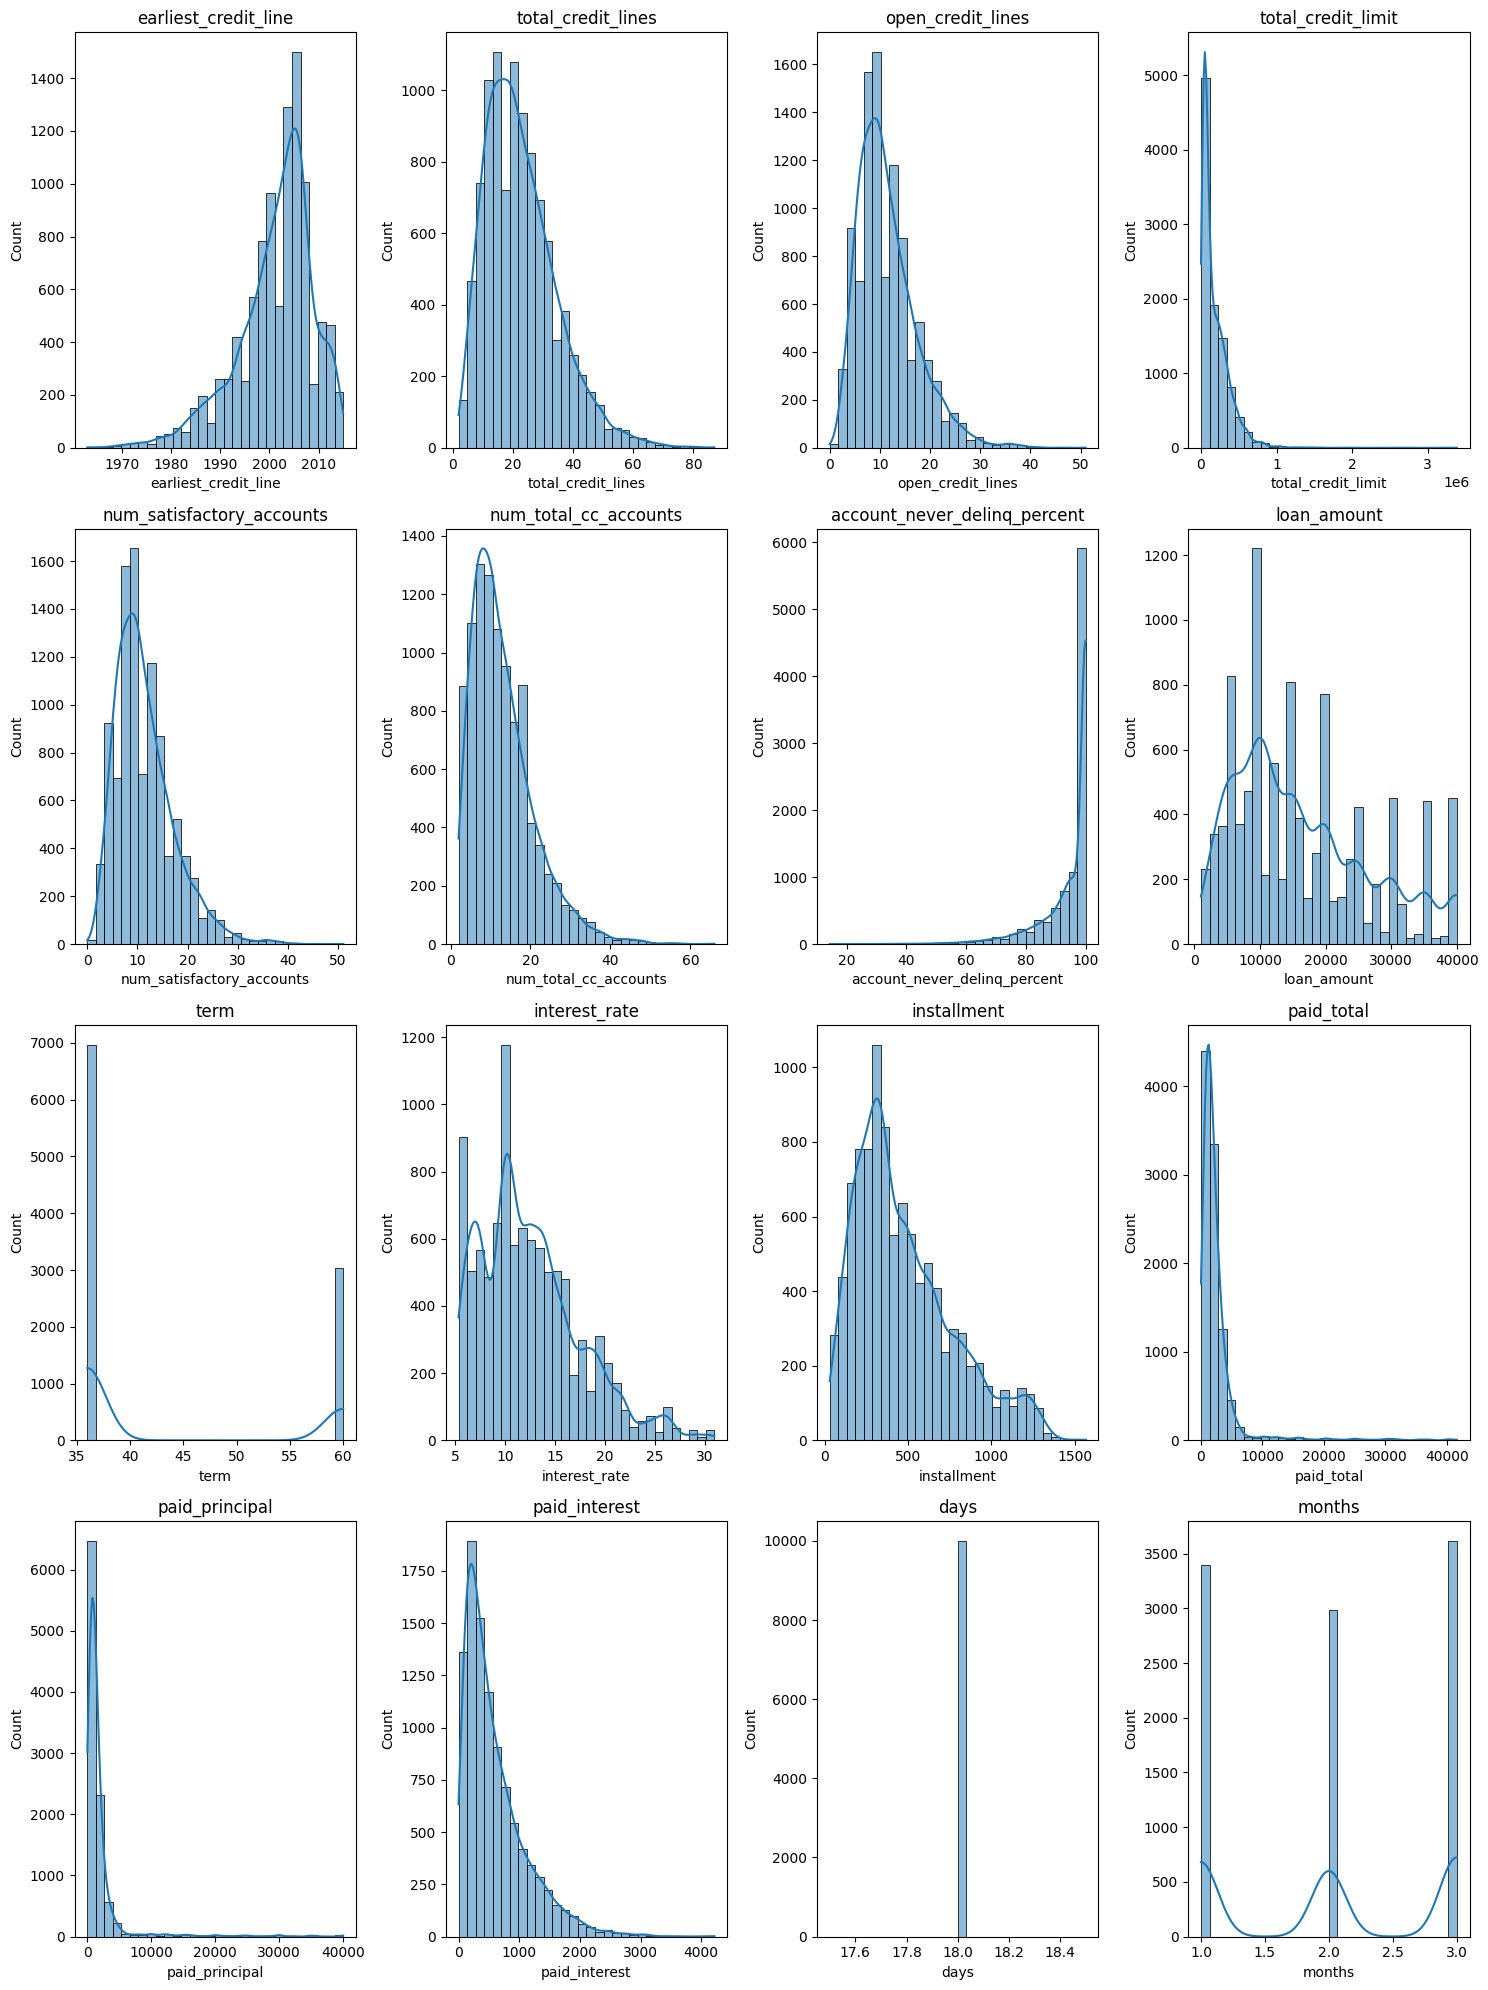

In [57]:
# Plotting distributions of numerical variables
numerical_cols = loans_club.select_dtypes (include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 4))  # Calculate required rows dynamically

plt.figure(figsize=(15, 5 * rows))  # Adjust figure size dynamically

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 4, i + 1)  # Use calculated rows
    sns.histplot(loans_club[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

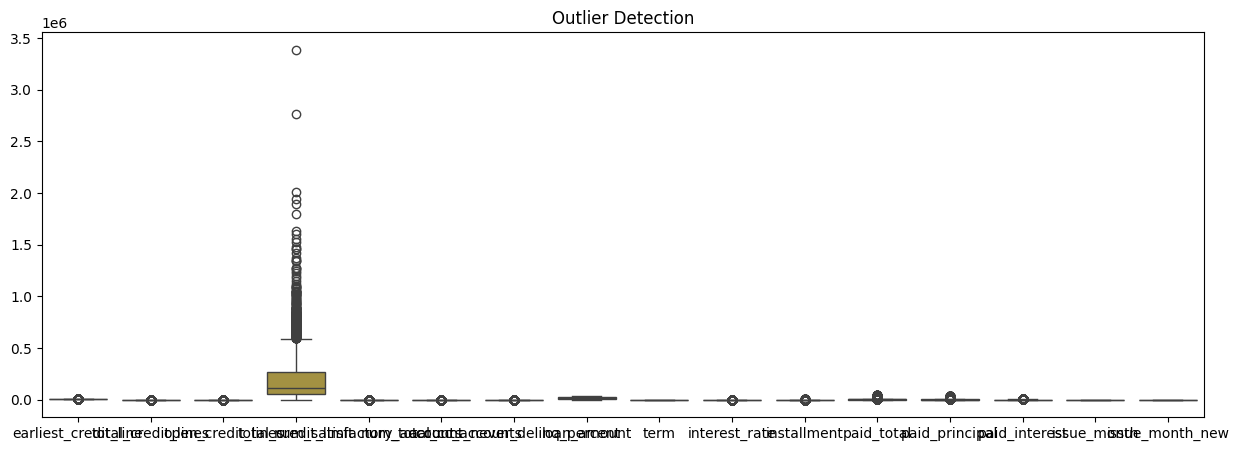

In [61]:
plt.figure(figsize=(15,5)) # Adjusted size for better clarity
sns.boxplot(data=lending_club.select_dtypes(include=[np.number]))
plt.title("Outlier Detection")
plt.show()

In [62]:
# Identifying columns with low variation (i.e., constant or near constant columns)
low_variation_columns = lending_club.select_dtypes(include=[np.number]).nunique()[lending_club.select_dtypes(include=[np.number]).nunique() <= 1].index

# Excluding low variation columns from Winsorization
numerical_columns = lending_club.select_dtypes(include=[np.number]).columns.difference(low_variation_columns)

# Apply Winsorization to the remaining columns
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
lending_club[numerical_columns] = winsor.fit_transform(lending_club[numerical_columns])

# Optionally, drop the low variation columns if needed
lending_club = lending_club.drop(columns=low_variation_columns)

# Check the updated data
print(lending_club.head())

                 emp_title emp_length state homeownership annual_income  \
0  global config engineer           3    NJ      MORTGAGE         90000   
1   warehouse office clerk         10    HI          RENT         40000   
2                 assembly          3    WI          RENT         40000   
3         customer service          1    PA          RENT         30000   
4     security supervisor          10    CA          RENT         35000   

   verified_income debt_to_income annual_income_joint  \
0         Verified          18.01                  NA   
1     Not Verified           5.04                  NA   
2  Source Verified          21.15                  NA   
3     Not Verified          10.16                  NA   
4         Verified          57.96               57000   

  verification_income_joint debt_to_income_joint  ... sub_grade loan_status  \
0                      None                   NA  ...        C3     Current   
1                      None                   NA

No outliers detected in earliest_credit_line


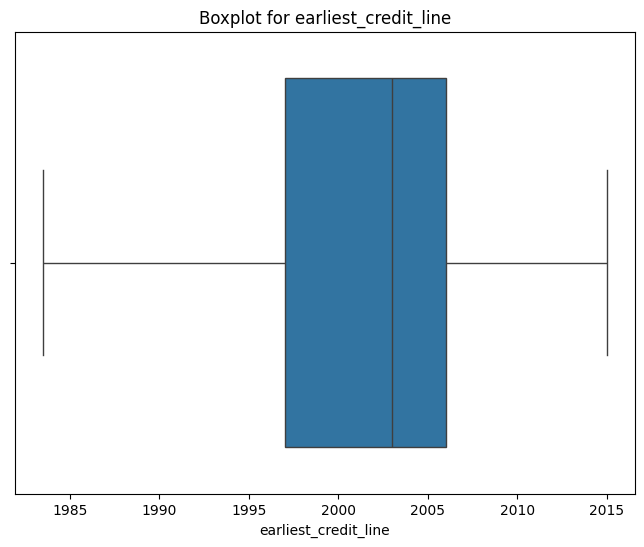

No outliers detected in total_credit_lines


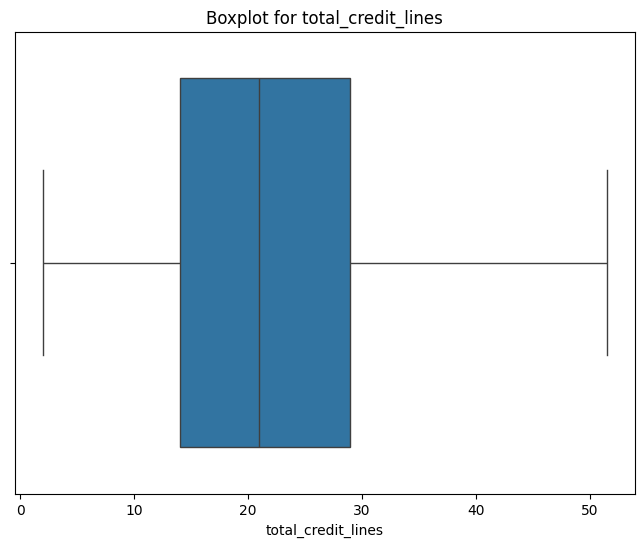

No outliers detected in open_credit_lines


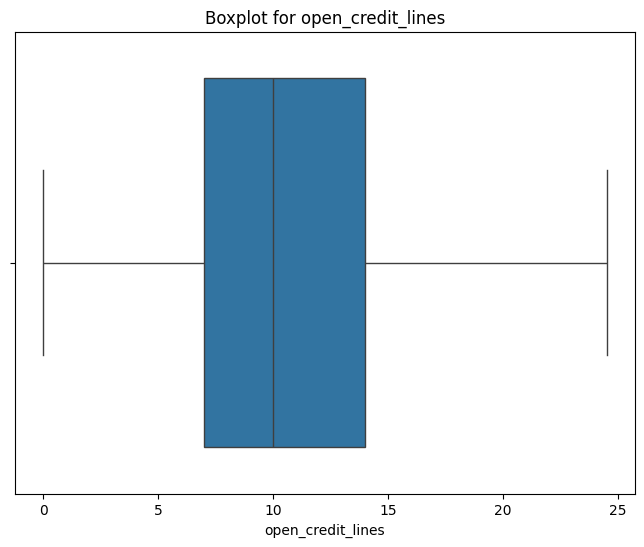

No outliers detected in total_credit_limit


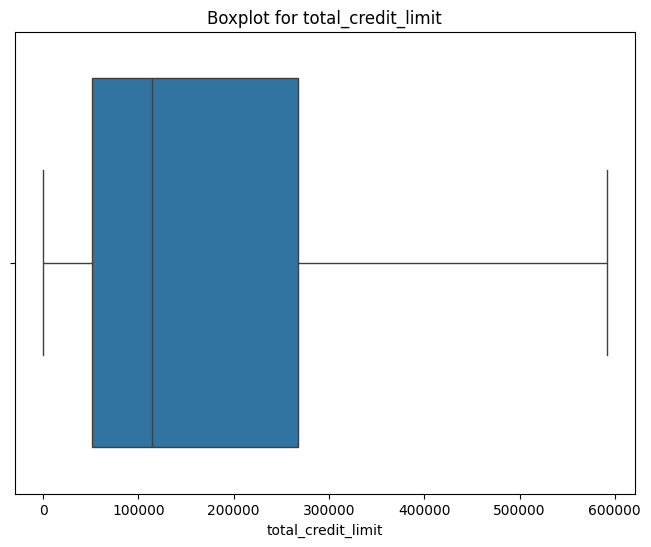

No outliers detected in num_satisfactory_accounts


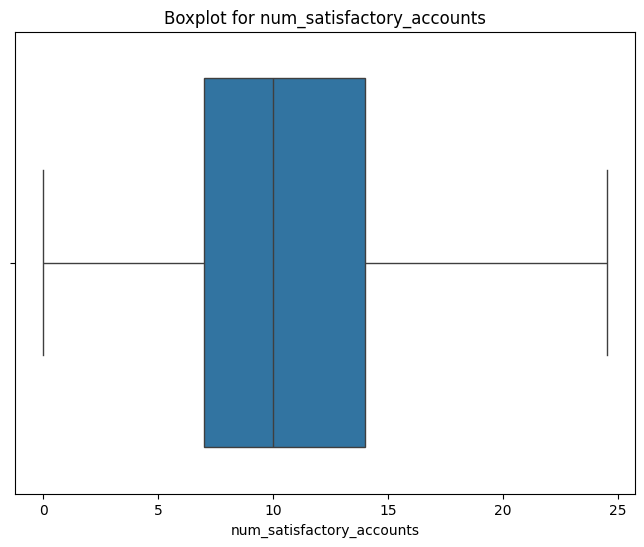

No outliers detected in num_total_cc_accounts


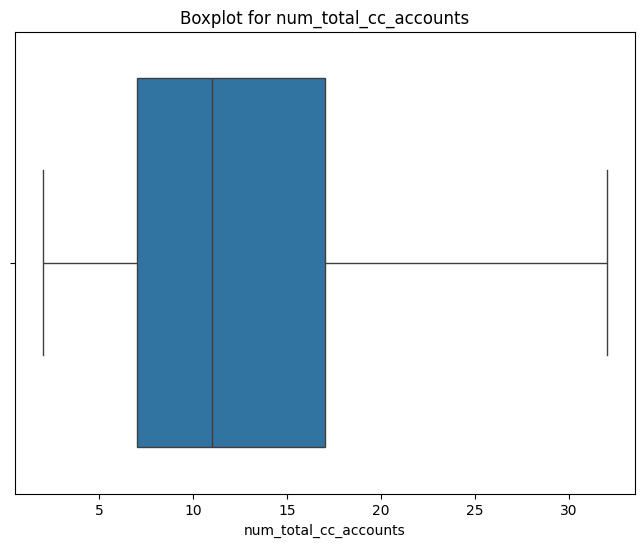

No outliers detected in account_never_delinq_percent


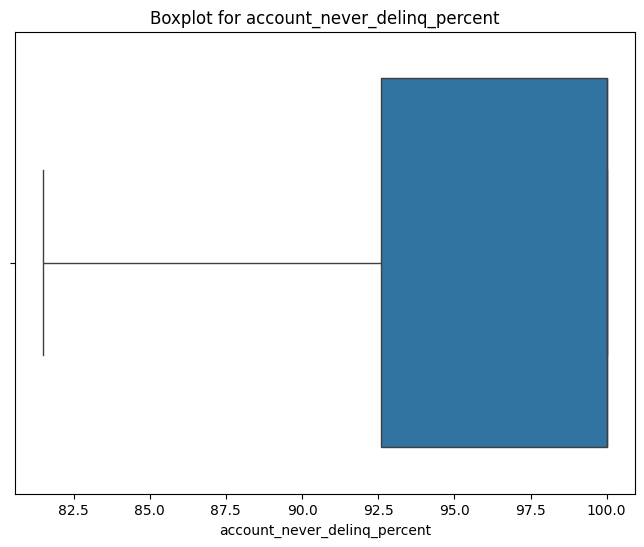

No outliers detected in loan_amount


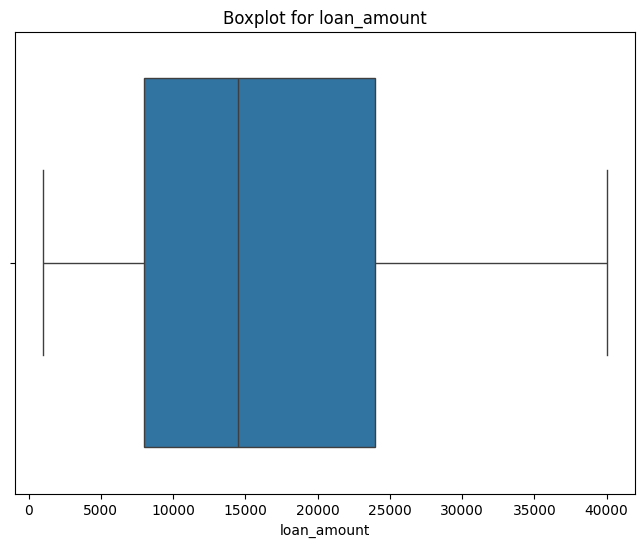

No outliers detected in term


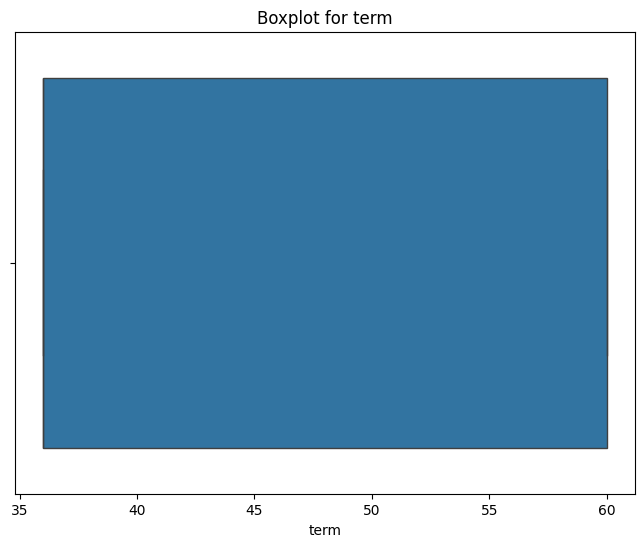

No outliers detected in interest_rate


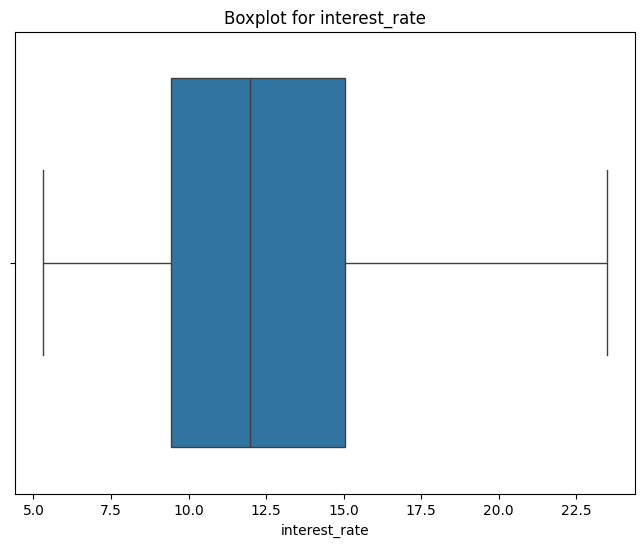

No outliers detected in installment


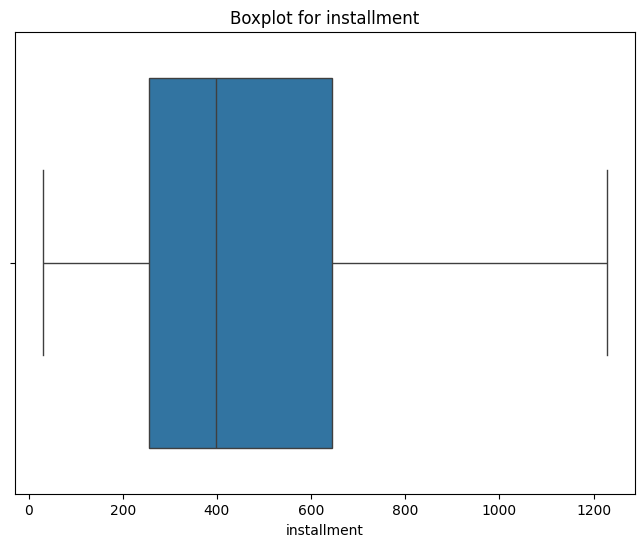

No outliers detected in paid_total


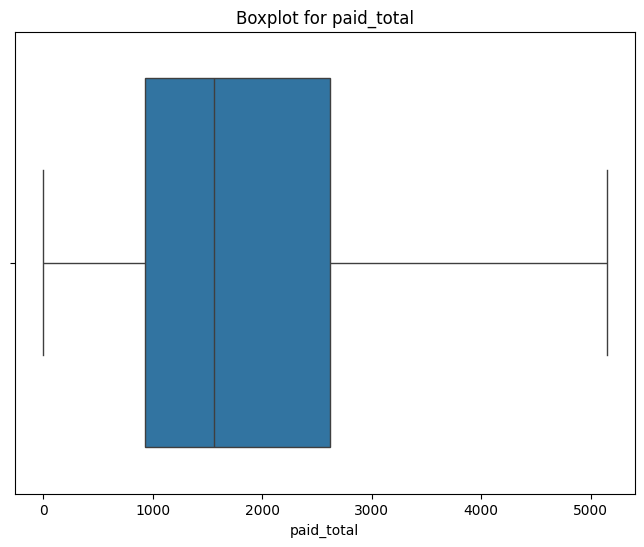

No outliers detected in paid_principal


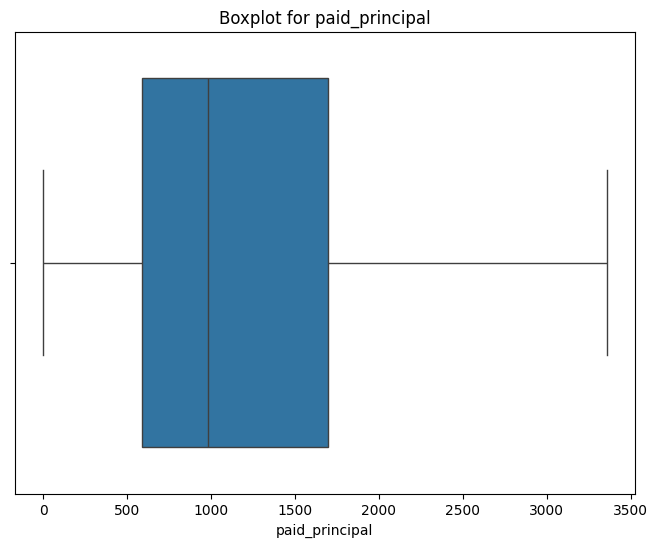

No outliers detected in paid_interest


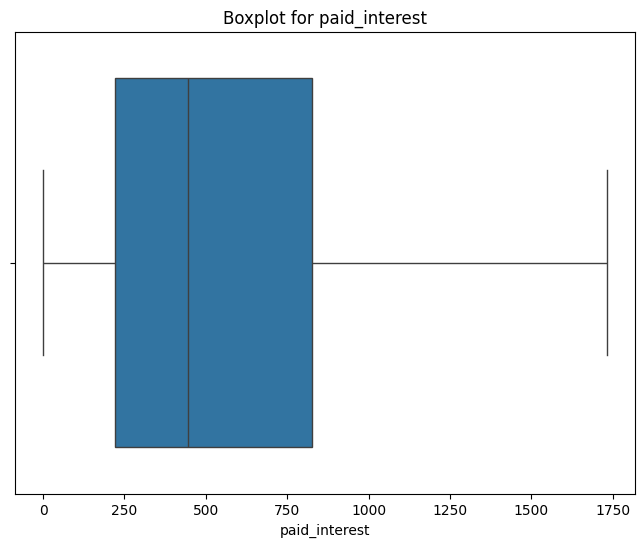

No outliers detected in issue_month_new


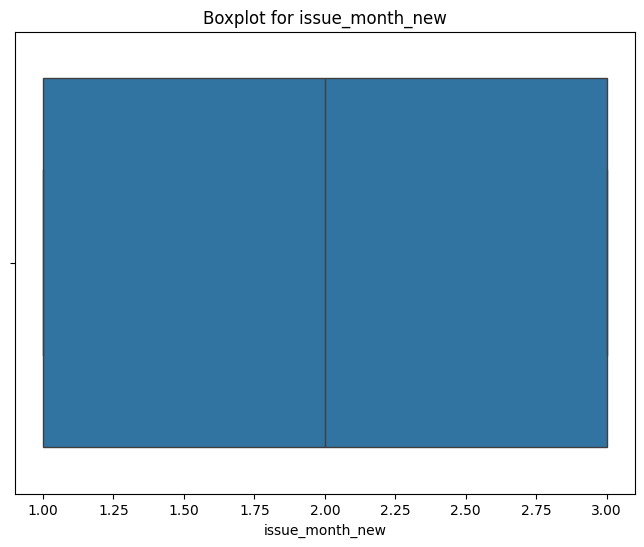

In [63]:
# Function to plot boxplot and show outliers
def plot_outliers(data, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        
        # Calculate IQR for detecting outliers
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are outliers
        outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]

        # Display a message if outliers are detected
        if not outliers.empty:
            print(f"Outliers detected in {column}:")
            print(outliers)
        else:
            print(f"No outliers detected in {column}")

        # Show the plot
        plt.title(f"Boxplot for {column}")
        plt.show()

# Identifying numerical columns
numerical_columns = lending_club.select_dtypes(include=[np.number]).columns

# Call the function to plot boxplots and detect outliers
plot_outliers(lending_club, numerical_columns)

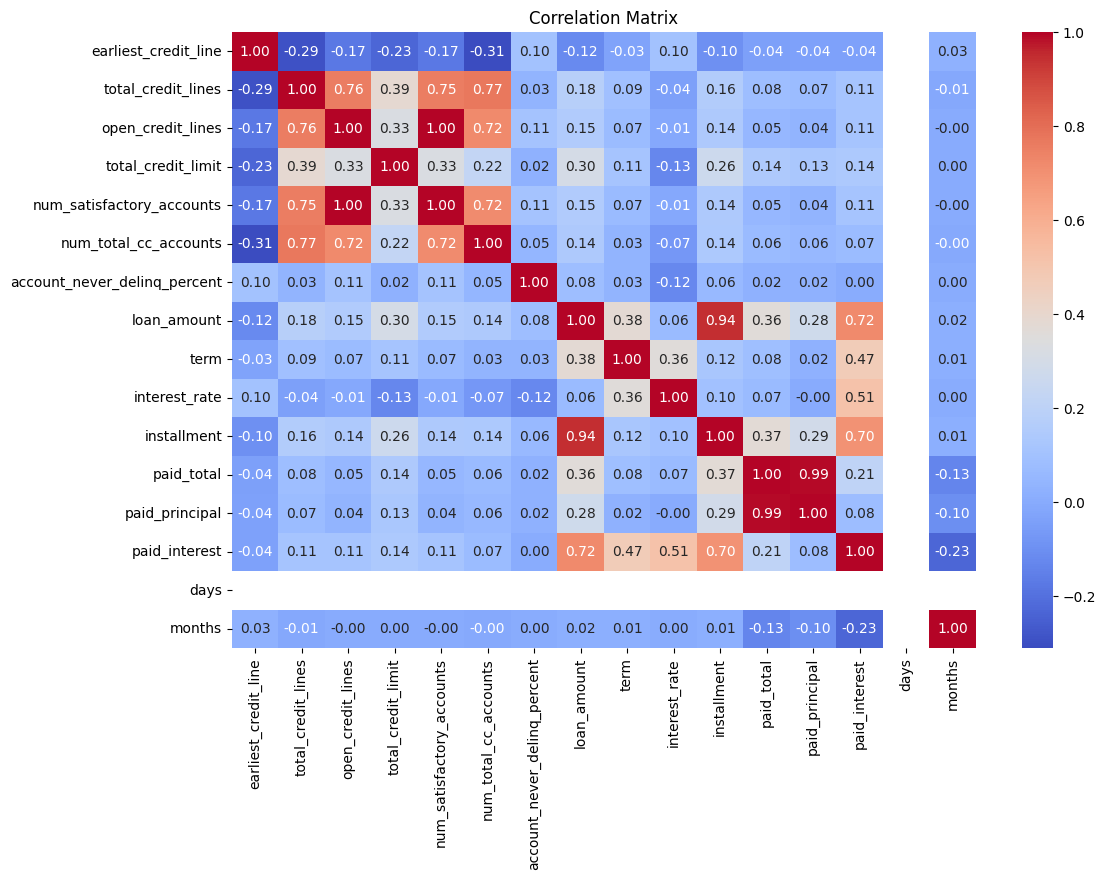

In [64]:
#Are there correlations between numerical variables?
#Understanding correlations helps identify multicollinearity
# Correlation matrix for numerical features
correlation_matrix = loans_club[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

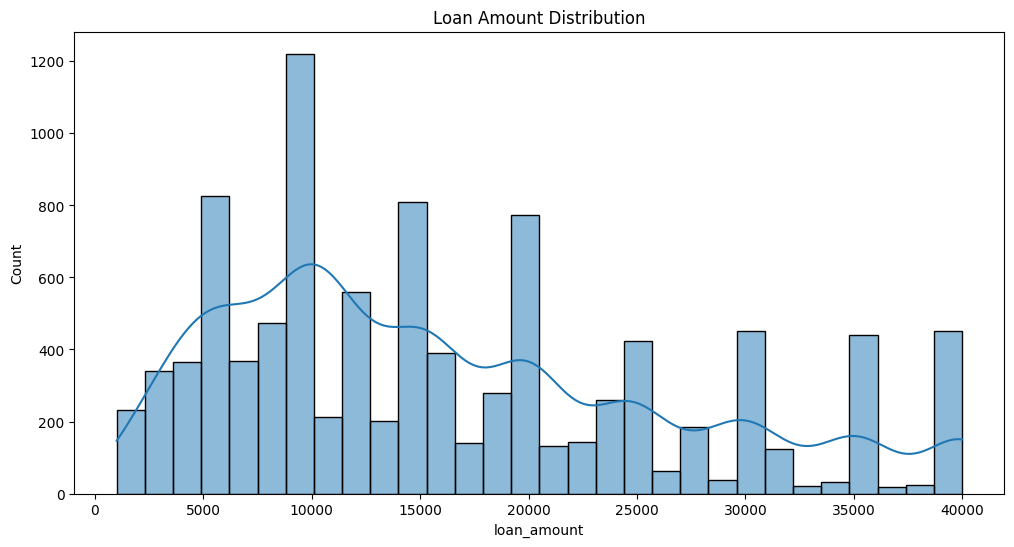

In [65]:
# Additional Visualizations
plt.figure(figsize=(12,6))
sns.histplot(lending_club['loan_amount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

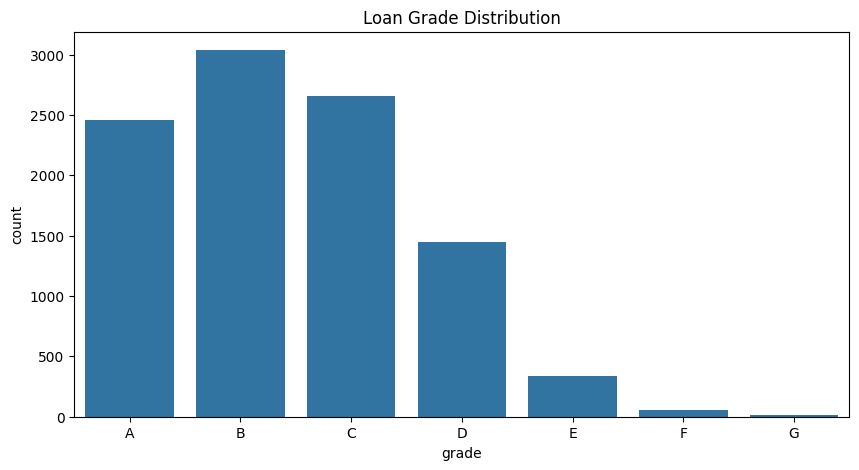

In [66]:
#Loan Grade Distribution
plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=lending_club, order=sorted(lending_club['grade'].unique()))
plt.title("Loan Grade Distribution")
plt.show()


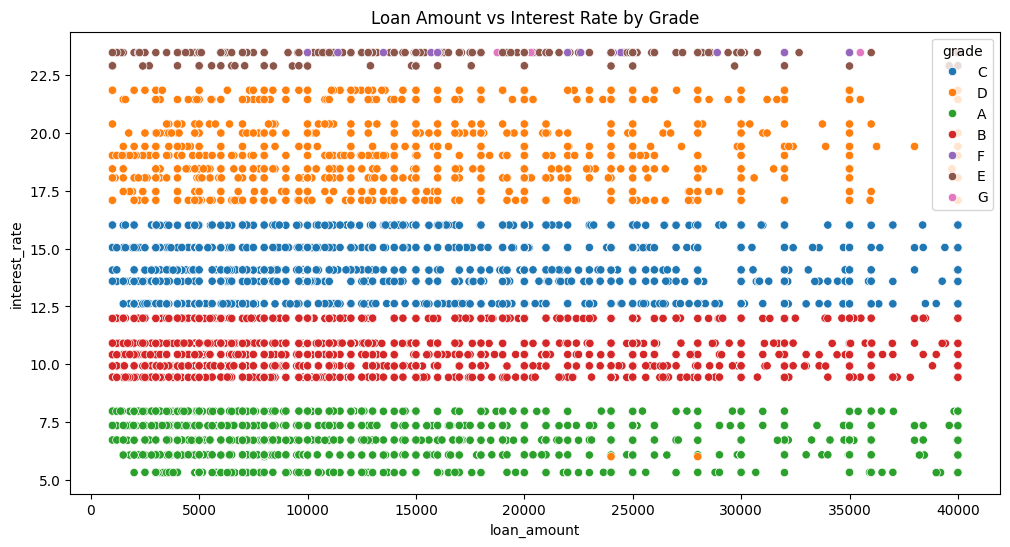

In [67]:
#Loan Amount vs Interest Rate by Grade
plt.figure(figsize=(12,6))
sns.scatterplot(x='loan_amount', y='interest_rate', hue='grade', data=lending_club)
plt.title("Loan Amount vs Interest Rate by Grade")
plt.show()

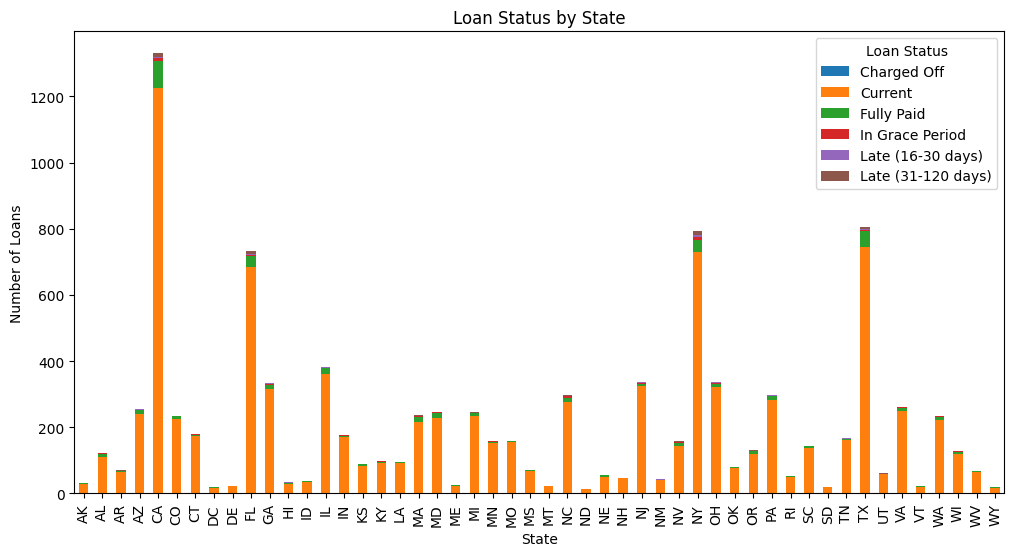

In [68]:
#How does loan status vary by state?
#Analyzing loan status by state can reveal geographic trends in loan approvals or defaults
 #Grouping loan status by state
loan_status_by_state = loans_club.groupby('state')['loan_status'].value_counts().unstack()

# Stacked bar chart
loan_status_by_state.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Loan Status by State')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
##provides insights into regional differences in loan performance, 
#helping businesses target specific areas for improvement or marketing.

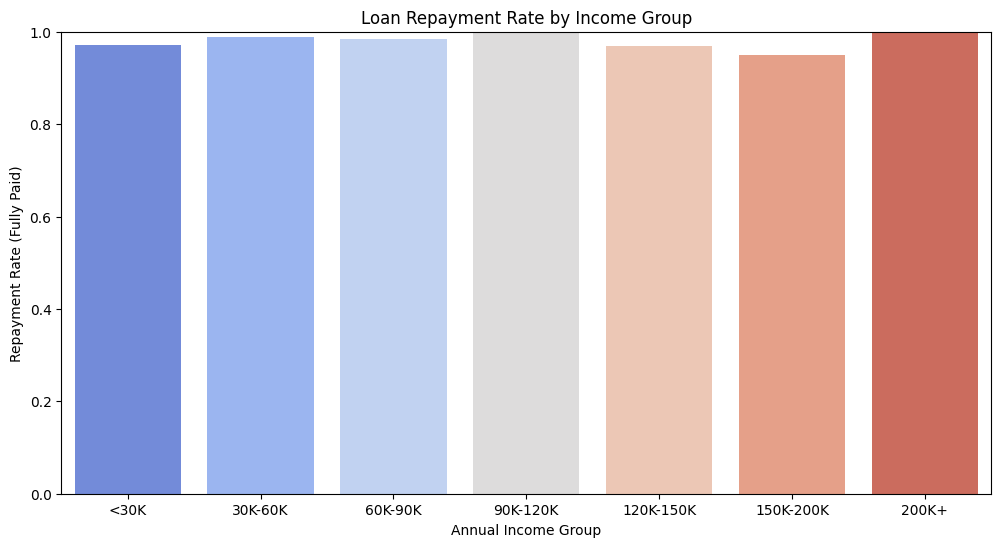

In [69]:
# Convert loan_status to numeric (0 for "Charged Off", 1 for "Fully Paid")
loans_club['loan_status_numeric'] = loans_club['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Convert 'annual_income' to numeric
loans_club['annual_income'] = pd.to_numeric(loans_club['annual_income'], errors='coerce')

# Define income bins and labels
income_bins = [0, 30000, 60000, 90000, 120000, 150000, 200000, 500000]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K-200K', '200K+']

# Create income groups
loans_club['income_group'] = pd.cut(loans_club['annual_income'], bins=income_bins, labels=income_labels)

# Calculate repayment rate per income group
income_loan_performance = loans_club.groupby('income_group')['loan_status_numeric'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=income_loan_performance.index, 
            y=income_loan_performance.values, 
            hue=income_loan_performance.index,  # Assign x variable to hue
            palette='coolwarm', 
            legend=False)  # Hide legend

plt.title('Loan Repayment Rate by Income Group')
plt.xlabel('Annual Income Group')
plt.ylabel('Repayment Rate (Fully Paid)')
plt.ylim(0, 1)  # Ensure the repayment rate is between 0 and 1
plt.show()

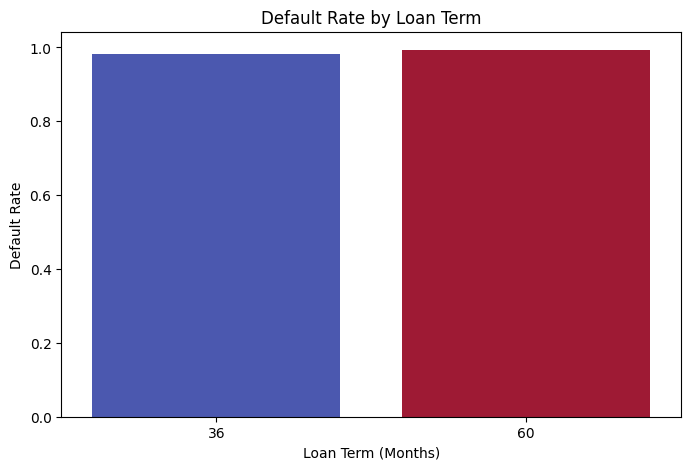

In [70]:
#Loan Term Impact on Default Probability
# Short vs Long Loan Terms & Default Rates
# Grouping loan term by default rate
loan_term_default = loans_club.groupby('term')['loan_status_numeric'].mean()

# Plotting the default rate for different loan terms
plt.figure(figsize=(8, 5))
sns.barplot(x=loan_term_default.index, 
            y=loan_term_default.values, 
            hue=loan_term_default.index,  # Assign x variable to hue to avoid warning
            palette='coolwarm', 
            legend=False)

plt.title('Default Rate by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Default Rate')
plt.show()

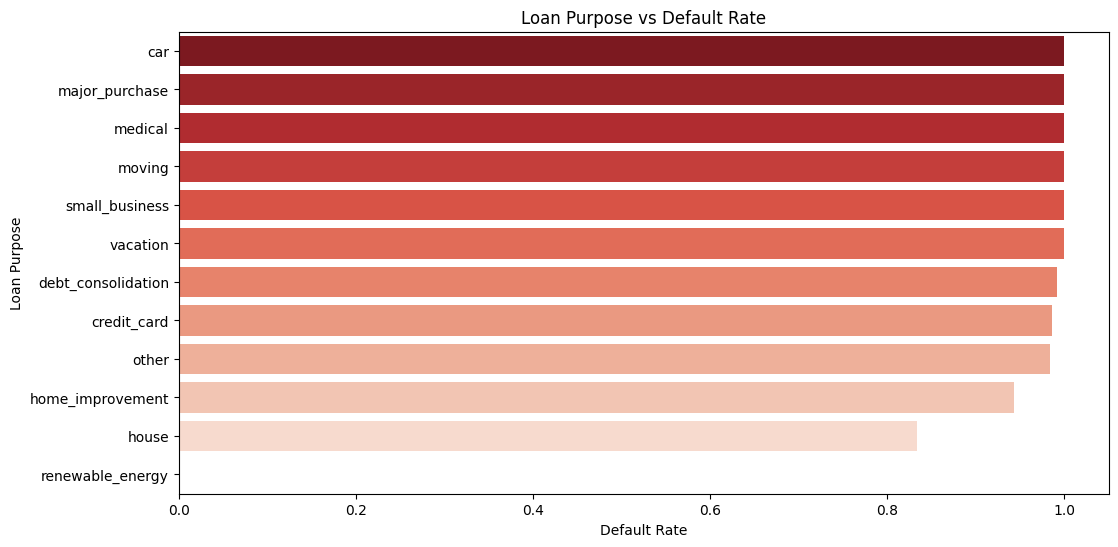

In [71]:
#Loan Purpose & Default Rates
#Does Loan Purpose Affect Loan Performance?
# Calculate default rates per loan purpose
loan_purpose_default = loans_club.groupby('loan_purpose')['loan_status_numeric'].mean().sort_values(ascending=False)

# Plot loan purposes with highest default rates
plt.figure(figsize=(12, 6))
sns.barplot(y=loan_purpose_default.index, 
            x=loan_purpose_default.values, 
            hue=loan_purpose_default.index,  # Assign y variable to hue to avoid warning
            palette='Reds_r',  
            legend=False)

plt.title('Loan Purpose vs Default Rate')
plt.xlabel('Default Rate')
plt.ylabel('Loan Purpose')
plt.show() 

In [81]:
# Prescriptive Analytics - Recommendations
print("Prescriptive Insights:")
if 'interest_rate' in loans_club.columns:
    high_risk_loans = lending_club[loans_club['loan_status'] == 1]
    print("High-Risk Loan Recommendations:")
    print(high_risk_loans[['loan_amount', 'interest_rate', 'grade']].head())
else:
    print("Interest rate column missing. Cannot provide prescriptive insights.")

Prescriptive Insights:
High-Risk Loan Recommendations:
   loan_amount  interest_rate grade
0        28000          14.07     C
1         5000          12.61     C
2         2000          17.09     D
3        21600           6.72     A
4        23000          14.07     C


In [82]:
# to convert sceintific number to readable formart
pd.options.display.float_format = '{:,.2f}'.format
loans_club.describe().T

,count,mean,min,25%,50%,75%,max,std
annual_income,"10,000.00","79,222.15",0.00,"45,000.00","65,000.00","95,000.00","2,300,000.00","64,734.29"
earliest_credit_line,"10,000.00","2,001.29","1,963.00","1,997.00","2,003.00","2,006.00","2,015.00",7.80
total_credit_lines,"10,000.00",22.68,2.00,14.00,21.00,29.00,87.00,11.89
open_credit_lines,"10,000.00",11.40,0.00,7.00,10.00,14.00,51.00,5.87
total_credit_limit,"10,000.00","183,606.23",0.00,"51,593.75","114,667.00","267,550.00","3,386,034.00","187,632.71"
num_satisfactory_accounts,"10,000.00",11.38,0.00,7.00,10.00,14.00,51.00,5.86
num_total_cc_accounts,"10,000.00",13.03,2.00,7.00,11.00,17.00,66.00,7.87
account_never_delinq_percent,"10,000.00",94.65,14.30,92.60,100.00,100.00,100.00,9.16
loan_amount,"10,000.00","16,361.92","1,000.00","8,000.00","14,500.00","24,000.00","40,000.00","10,301.96"
term,"10,000.00",43.27,36.00,36.00,36.00,60.00,60.00,11.03
